<a href="https://colab.research.google.com/github/Arian104/Submerged-Sensor-Future-Position-Prediction-Using-Cayley-Menger-Determinant/blob/main/ML_for_cayley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
from google.colab import drive
import random

# Mount Google Drive
drive.mount('/content/drive')

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Function to add Gaussian error
def add_gaussian_error(d):
    mean = 0  # Mean of the Gaussian noise
    std_dev = 0.5  # Standard deviation of the Gaussian noise
    noise = np.random.normal(mean, std_dev)
    return d + noise

# Initial S3 position
S3_initial = np.array([85, 95, 0])
S3_position = S3_initial.copy()
step_x = random.uniform(-.6, .6)  # Small step change in x-direction
step_y = random.uniform(-.6, .6)  # Small step change in y-direction

# Function to simulate ocean current increment
def update_ocean_current(current_pos):
    new_x = current_pos[0] + step_x
    new_y = current_pos[1] + step_y
    return np.array([new_x, new_y, 0])

# Initialize list to hold all distances with error for 60 iterations
all_distances_with_error = []

# Set initial position for S3
S3 = S3_position.copy()  # Initialize S3 for the first iteration

# Perform 60 iterations
for iteration in range(60):
    surface_beacons = np.array([
        [0, 0, 50],           # A1
        [30.9, 95.1, 50],     # A2
        [-80.9, 58.7, 50],    # A3
        [-80.9, -58.7, 50],   # A4
        [30.9, -95.1, 50],    # A5
        [100, 0, 50]          # A6
    ])

    # Fixed sensor coordinates
    S1 = np.array([0, 0, 0])
    S2 = np.array([0, 60, 0])

    # Update S3's x and y coordinates based on ocean current
    S3 = update_ocean_current(S3)  # Incremental change in S3
    print(f"S3 updated to: {S3} due to ocean current")

    # Calculate distances from beacon nodes to sensors
    distances = []
    for B in surface_beacons:
        d1 = euclidean_distance(B, S1)
        d2 = euclidean_distance(B, S2)
        d3 = euclidean_distance(B, S3)
        distances.append([d1, d2, d3])

    distances = np.array(distances)

    # Add Gaussian error to distances
    distances_with_error = np.vectorize(add_gaussian_error)(distances)

    # Add iteration number to distances
    for i, dist in enumerate(distances_with_error):
        all_distances_with_error.append([iteration+1, f"A{i+1}", dist[0], dist[1], dist[2]])

# Save all distances with errors to CSV in Google Drive
csv_path = '/content/drive/MyDrive/distances_60_iterations.csv'
with open(csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Beacon", "Distance to S1", "Distance to S2", "Distance to S3"])
    writer.writerows(all_distances_with_error)

print("Distances with Gaussian error for 60 iterations saved to distances_60_iterations.csv in Google Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
S3 updated to: [85.40138248 95.46141643  0.        ] due to ocean current
S3 updated to: [85.80276497 95.92283287  0.        ] due to ocean current
S3 updated to: [86.20414745 96.3842493   0.        ] due to ocean current
S3 updated to: [86.60552994 96.84566573  0.        ] due to ocean current
S3 updated to: [87.00691242 97.30708216  0.        ] due to ocean current
S3 updated to: [87.40829491 97.7684986   0.        ] due to ocean current
S3 updated to: [87.80967739 98.22991503  0.        ] due to ocean current
S3 updated to: [88.21105987 98.69133146  0.        ] due to ocean current
S3 updated to: [88.61244236 99.1527479   0.        ] due to ocean current
S3 updated to: [89.01382484 99.61416433  0.        ] due to ocean current
S3 updated to: [ 89.41520733 100.07558076   0.        ] due to ocean current
S3 updated to: [ 89.81658981 100.53699719   0.        

In [ ]:
import numpy as np
import csv
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read distances from CSV
csv_path = '/content/drive/MyDrive/distances_60_iterations.csv'
all_distances = []

with open(csv_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        iteration = int(row[0])
        beacon = row[1]
        distances = [float(row[2]), float(row[3]), float(row[4])]
        all_distances.append([iteration, beacon] + distances)

# Convert to numpy array for easier manipulation
all_distances = np.array(all_distances, dtype=object)

# Initialize list to hold final coordinates for each iteration
final_coordinates = []

# Perform calculations for each iteration
for iteration in range(1, 61):
    # Filter distances for the current iteration
    iteration_distances = all_distances[all_distances[:, 0] == iteration]

    # Debugging: Check the iteration distances
    print(f"\nIteration {iteration} distances:")
    print(iteration_distances)

    # Ensure there are exactly 6 rows for each iteration
    if iteration_distances.shape[0] != 6:
        print(f"Iteration {iteration}: Incorrect number of distance entries ({iteration_distances.shape[0]})")
        continue

    try:
        # Extract distances
        d14, d24, d34 = iteration_distances[0, 2:5].astype(float)
        d15, d25, d35 = iteration_distances[1, 2:5].astype(float)
        d16, d26, d36 = iteration_distances[2, 2:5].astype(float)
        d17, d27, d37 = iteration_distances[3, 2:5].astype(float)
        d18, d28, d38 = iteration_distances[4, 2:5].astype(float)
        d19, d29, d39 = iteration_distances[5, 2:5].astype(float)

        # Cayley-Menger determinant
        A = np.array([
            [d14**2, d24**2, d34**2, -(d14**2 - d34**2)*(d24**2 - d14**2), -(d24**2 - d14**2)*(d34**2 - d24**2), 1],
            [d15**2, d25**2, d35**2, -(d15**2 - d35**2)*(d25**2 - d15**2), -(d25**2 - d15**2)*(d35**2 - d25**2), 1],
            [d16**2, d26**2, d36**2, -(d16**2 - d36**2)*(d26**2 - d16**2), -(d26**2 - d16**2)*(d36**2 - d26**2), 1],
            [d17**2, d27**2, d37**2, -(d17**2 - d37**2)*(d27**2 - d17**2), -(d27**2 - d17**2)*(d37**2 - d27**2), 1],
            [d18**2, d28**2, d38**2, -(d18**2 - d38**2)*(d28**2 - d18**2), -(d28**2 - d18**2)*(d38**2 - d28**2), 1],
            [d19**2, d29**2, d39**2, -(d19**2 - d39**2)*(d29**2 - d19**2), -(d29**2 - d19**2)*(d39**2 - d29**2), 1]
        ])

        B = np.array([
            (d24**2 - d34**2)*(d34**2 - d14**2),
            (d25**2 - d35**2)*(d35**2 - d15**2),
            (d26**2 - d36**2)*(d36**2 - d16**2),
            (d27**2 - d37**2)*(d37**2 - d17**2),
            (d28**2 - d38**2)*(d38**2 - d18**2),
            (d29**2 - d39**2)*(d39**2 - d19**2)
        ])

        # Solve the linear system
        x = np.linalg.solve(A, B)
        # Calculate unknown inner distances
        d12 = np.sqrt(x[2] / (1 - x[3] - x[4]))
        d13 = np.sqrt((x[2] * x[4]) / (1 - x[3] - x[4]))
        d23 = np.sqrt((x[2] * x[3]) / (1 - x[3] - x[4]))

        # Calculate final coordinates
        y2 = d12
        y3 = (d12**2 + d13**2 - d23**2) / (2 * d12)
        x3 = np.sqrt(d13**2 - ((d12**2 + d13**2 - d23**2) / (2 * d12))**2)

        # Final coordinates of the sensors
        S = np.array([
            [0, 0, 0],
            [0, y2, 0],
            [x3, y3, 0]
        ])

        # Append the final coordinates to the list
        final_coordinates.append([iteration, S[0, 0], S[0, 1], S[0, 2], S[1, 0], S[1, 1], S[1, 2], S[2, 0], S[2, 1], S[2, 2]])

        # Print results for verification
        print("Unknown distances:")
        print(f"d12: {d12:.2f}, d13: {d13:.2f}, d23: {d23:.2f}")

        print("Final coordinates of the submerged sensors:")
        print(S)
    except np.linalg.LinAlgError:
        print(f"Iteration {iteration}: Singular matrix, cannot solve.")

# Save final coordinates to CSV in Google Drive
final_csv_path = '/content/drive/MyDrive/final_coordinates_60_iterations.csv'
with open(final_csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "S1_x", "S1_y", "S1_z", "S2_x", "S2_y", "S2_z", "S3_x", "S3_y", "S3_z"])
    writer.writerows(final_coordinates)

print("Final coordinates for each iteration saved to final_coordinates_60_iterations.csv in Google Drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Iteration 1 distances:
[[1 'A1' 49.973062335546054 77.4608240911342 138.243464898983]
 [1 'A2' 111.77682801959286 68.69532219911534 73.7652966289177]
 [1 'A3' 111.74780156813777 94.15828302958322 177.47846301784963]
 [1 'A4' 111.38012513826924 151.7508469931928 232.35452855581278]
 [1 'A5' 112.69029001481057 166.5698134203185 204.4640773493866]
 [1 'A6' 112.65750841191341 127.95719966641366 107.92885067658946]]
Unknown distances:
d12: 59.40, d13: 127.90, d23: 93.43
Final coordinates of the submerged sensors:
[[ 0.          0.          0.        ]
 [ 0.         59.3973037   0.        ]
 [86.8165562  93.92431145  0.        ]]

Iteration 2 distances:
[[2 'A1' 50.86522009365138 77.71316077742507 138.06789610717092]
 [2 'A2' 111.07681204103022 67.47835618890012 74.67516458380092]
 [2 'A3' 111.88955178082317 94.78546083940044 177.8071946899415]
 [2 'A4' 111.580718

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
csv_path = '/content/drive/MyDrive/final_coordinates_60_iterations.csv'
data = pd.read_csv(csv_path)

# Extract features (Iteration) and target variables (S3_x, S3_y)
X = data[['Iteration']]
y_x = data['S3_x']
y_y = data['S3_y']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Train Linear Regression models for S3_x and S3_y
lin_reg_x = LinearRegression()
lin_reg_y = LinearRegression()

lin_reg_x.fit(X_train, y_x_train)
lin_reg_y.fit(X_train, y_y_train)

# Train Random Forest models for S3_x and S3_y with hyperparameter tuning
rf_reg_x = RandomForestRegressor(random_state=42)
rf_reg_y = RandomForestRegressor(random_state=42)

# Perform grid search for hyperparameter tuning (adjust as needed for your data)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_x = GridSearchCV(rf_reg_x, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_y = GridSearchCV(rf_reg_y, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_x.fit(X_train, y_x_train)
grid_search_y.fit(X_train, y_y_train)

# Use the best estimators from the grid search
rf_reg_x_best = grid_search_x.best_estimator_
rf_reg_y_best = grid_search_y.best_estimator_

# Predict the future positions using both models
y_x_pred_lin = lin_reg_x.predict(X_test)
y_y_pred_lin = lin_reg_y.predict(X_test)

y_x_pred_rf = rf_reg_x_best.predict(X_test)
y_y_pred_rf = rf_reg_y_best.predict(X_test)

# Evaluate the accuracy using MSE, MAE, and R² Score
mse_lin_x = mean_squared_error(y_x_test, y_x_pred_lin)
mse_lin_y = mean_squared_error(y_y_test, y_y_pred_lin)
mse_rf_x = mean_squared_error(y_x_test, y_x_pred_rf)
mse_rf_y = mean_squared_error(y_y_test, y_y_pred_rf)

mae_lin_x = mean_absolute_error(y_x_test, y_x_pred_lin)
mae_lin_y = mean_absolute_error(y_y_test, y_y_pred_lin)
mae_rf_x = mean_absolute_error(y_x_test, y_x_pred_rf)
mae_rf_y = mean_absolute_error(y_y_test, y_y_pred_rf)

r2_lin_x = r2_score(y_x_test, y_x_pred_lin)
r2_lin_y = r2_score(y_y_test, y_y_pred_lin)
r2_rf_x = r2_score(y_x_test, y_x_pred_rf)
r2_rf_y = r2_score(y_y_test, y_y_pred_rf)

# Convert R² score to percentage accuracy
accuracy_lin = (r2_lin_x*r2_lin_y) * 100
accuracy_rf_x = (r2_rf_x*r2_rf_y) * 100

# Output the MSE, MAE, R² scores, and accuracy percentages
print(f"Linear Regression MSE for S3_x: {mse_lin_x}")
print(f"Linear Regression MSE for S3_y: {mse_lin_y}")
print(f"Linear Regression MAE for S3_x: {mae_lin_x}")
print(f"Linear Regression MAE for S3_y: {mae_lin_y}")
print(f"Linear Regression R² for S3_x: {r2_lin_x:.2f}")
print(f"Linear Regression R² for S3_y: {r2_lin_y:.2f}")
print(f"Linear Regression Aaccuracy: {accuracy_lin:.2f}%")

print(f"Random Forest MSE for S3_x: {mse_rf_x}")
print(f"Random Forest MSE for S3_y: {mse_rf_y}")
print(f"Random Forest MAE for S3_x: {mae_rf_x}")
print(f"Random Forest MAE for S3_y: {mae_rf_y}")
print(f"Random Forest R² for S3_x: {r2_rf_x:.2f}")
print(f"Random Forest R² for S3_y: {r2_rf_y:.2f}")
print(f"Random Forest Aaccuracy: {accuracy_rf_x:.2f}%")

# Future predictions (for iterations 61 to 80)
future_iterations = pd.DataFrame({'Iteration': list(range(61, 81))})  # Iterations from 61 to 80
future_s3_x_lin = lin_reg_x.predict(future_iterations)
future_s3_y_lin = lin_reg_y.predict(future_iterations)

future_s3_x_rf = rf_reg_x_best.predict(future_iterations)
future_s3_y_rf = rf_reg_y_best.predict(future_iterations)

print("\nFuture predictions using Linear Regression:")
print(pd.DataFrame({'Iteration': list(range(61, 81)), 'S3_x': future_s3_x_lin, 'S3_y': future_s3_y_lin}))

print("\nFuture predictions using Random Forest:")
print(pd.DataFrame({'Iteration': list(range(61, 81)), 'S3_x': future_s3_x_rf, 'S3_y': future_s3_y_rf}))


Linear Regression MSE for S3_x: 1.550161407902013
Linear Regression MSE for S3_y: 3.9619723362917267
Linear Regression MAE for S3_x: 0.9978410563108646
Linear Regression MAE for S3_y: 1.5490609928485373
Linear Regression R² for S3_x: 0.98
Linear Regression R² for S3_y: 0.96
Linear Regression Aaccuracy: 93.63%
Random Forest MSE for S3_x: 2.0653192636925963
Random Forest MSE for S3_y: 5.898981018874267
Random Forest MAE for S3_x: 1.112221284962562
Random Forest MAE for S3_y: 2.062574748344956
Random Forest R² for S3_x: 0.97
Random Forest R² for S3_y: 0.94
Random Forest Aaccuracy: 90.92%

Future predictions using Linear Regression:
    Iteration        S3_x        S3_y
0          61  109.365613  122.720010
1          62  109.766583  123.181431
2          63  110.167553  123.642853
3          64  110.568522  124.104274
4          65  110.969492  124.565696
5          66  111.370461  125.027117
6          67  111.771431  125.488539
7          68  112.172400  125.949960
8          69  112.57

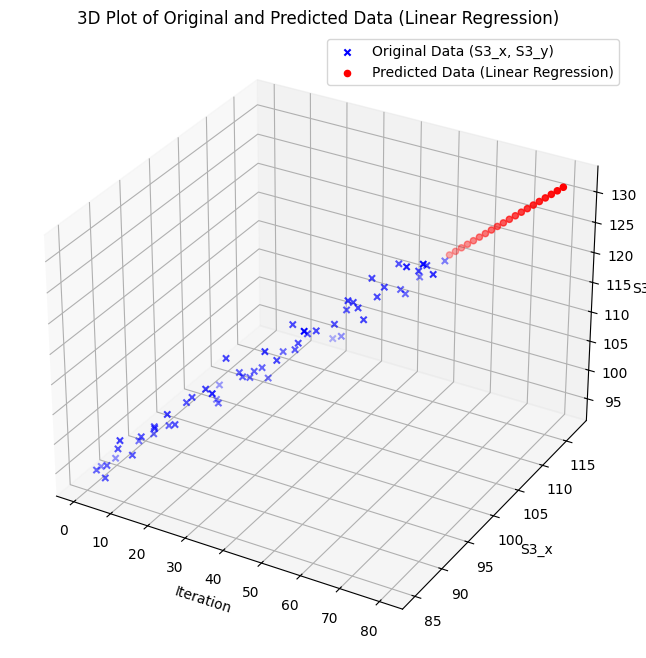

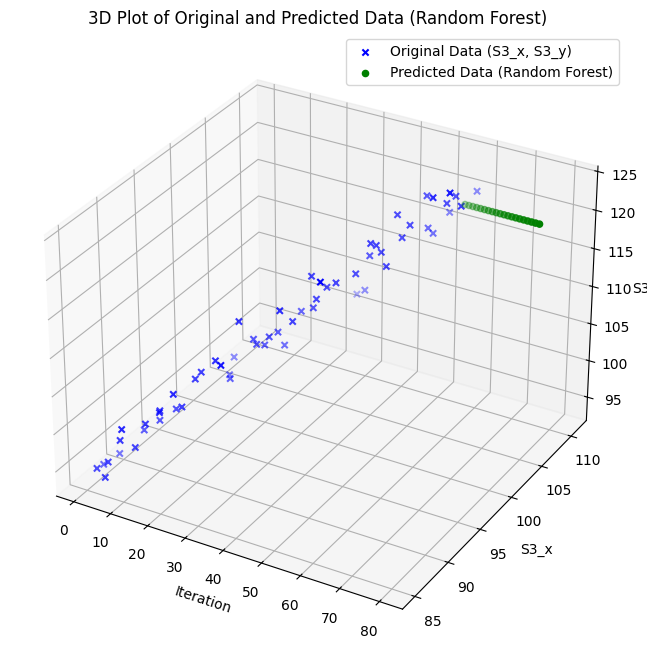

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
csv_path = '/content/drive/MyDrive/final_coordinates_60_iterations.csv'
data = pd.read_csv(csv_path)

# Extract features (Iteration) and target variables (S3_x, S3_y)
X = data[['Iteration']]
y_x = data['S3_x']
y_y = data['S3_y']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.2, random_state=42)

# Train Linear Regression models for S3_x and S3_y
lin_reg_x = LinearRegression()
lin_reg_y = LinearRegression()

lin_reg_x.fit(X_train, y_x_train)
lin_reg_y.fit(X_train, y_y_train)

# Train Random Forest models for S3_x and S3_y
rf_reg_x = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_y = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg_x.fit(X_train, y_x_train)
rf_reg_y.fit(X_train, y_y_train)

# Generate future predictions for iterations 61 to 80
future_iterations = pd.DataFrame({'Iteration': range(61, 81)})
future_s3_x_lin = lin_reg_x.predict(future_iterations)
future_s3_y_lin = lin_reg_y.predict(future_iterations)

future_s3_x_rf = rf_reg_x.predict(future_iterations)
future_s3_y_rf = rf_reg_y.predict(future_iterations)

# Combine predictions into dataframes
future_predictions_lin = pd.DataFrame({
    'Iteration': future_iterations['Iteration'],
    'S3_x': future_s3_x_lin,
    'S3_y': future_s3_y_lin
})

future_predictions_rf = pd.DataFrame({
    'Iteration': future_iterations['Iteration'],
    'S3_x': future_s3_x_rf,
    'S3_y': future_s3_y_rf
})

# 3D Plot for Linear Regression
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Iteration'], y_x, y_y, c='blue', label='Original Data (S3_x, S3_y)', marker='x')
ax.scatter(future_predictions_lin['Iteration'], future_predictions_lin['S3_x'], future_predictions_lin['S3_y'],
           c='red', label='Predicted Data (Linear Regression)', marker='o')
ax.set_xlabel('Iteration')
ax.set_ylabel('S3_x')
ax.set_zlabel('S3_y')
ax.set_title('3D Plot of Original and Predicted Data (Linear Regression)')
ax.legend()
plt.show()

# 3D Plot for Random Forest
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Iteration'], y_x, y_y, c='blue', label='Original Data (S3_x, S3_y)', marker='x')
ax.scatter(future_predictions_rf['Iteration'], future_predictions_rf['S3_x'], future_predictions_rf['S3_y'],
           c='green', label='Predicted Data (Random Forest)', marker='o')
ax.set_xlabel('Iteration')
ax.set_ylabel('S3_x')
ax.set_zlabel('S3_y')
ax.set_title('3D Plot of Original and Predicted Data (Random Forest)')
ax.legend()
plt.show()



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0959 - val_loss: 0.0847
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0740 - val_loss: 0.0644
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0562 - val_loss: 0.0459
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - val_loss: 0.0300
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0267 - val_loss: 0.0173
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0168 - val_loss: 0.0087
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0084 - val_loss: 0.0046
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026 - val_loss: 0.0063
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032 - val_loss: 0.0090
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046 - val_loss: 0.0102
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0050 - val_loss: 0.0100
Epoch 13/50

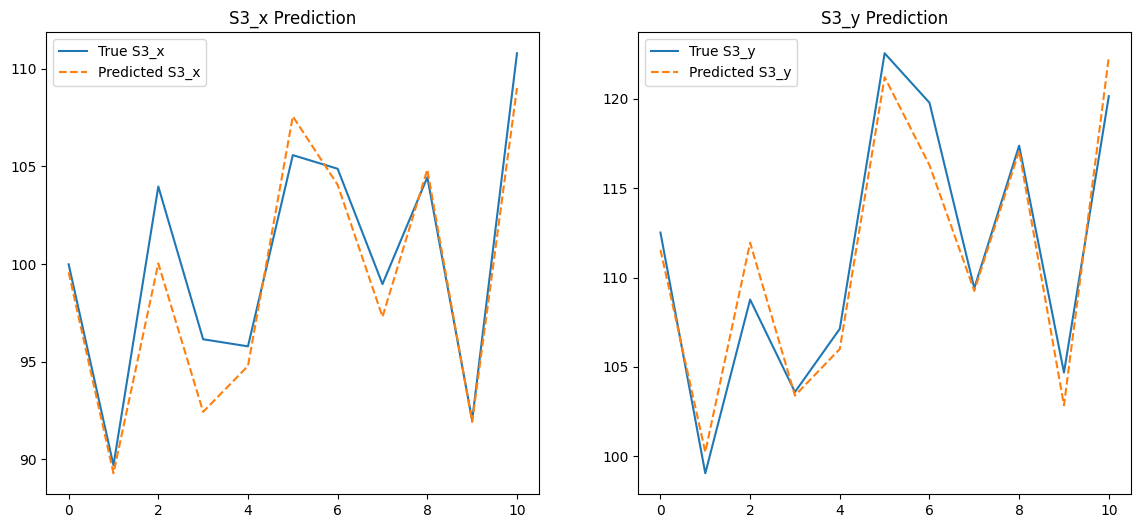

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━

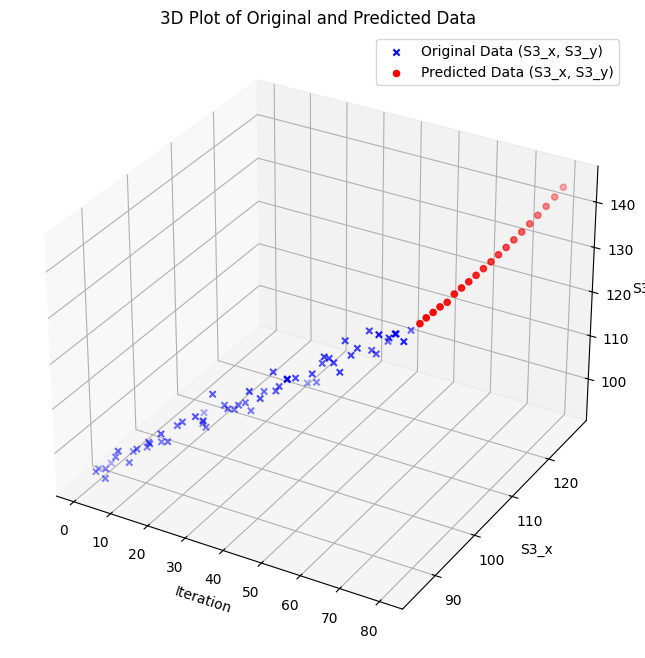

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
csv_path = '/content/drive/MyDrive/final_coordinates_60_iterations.csv'
data = pd.read_csv(csv_path)

# Extract features (Iteration) and target variables (S3_x, S3_y)
X = data[['Iteration']].values
y_x = data['S3_x'].values
y_y = data['S3_y'].values

# Normalize the data for RNN
scaler_x = MinMaxScaler()
scaler_y_x = MinMaxScaler()
scaler_y_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
y_x_scaled = scaler_y_x.fit_transform(y_x.reshape(-1, 1))
y_y_scaled = scaler_y_y.fit_transform(y_y.reshape(-1, 1))

# Convert to time-series format (RNN requires sequential data)
def create_time_series(X, y_x, y_y, time_steps=5):
    X_ts, y_ts_x, y_ts_y = [], [], []
    for i in range(len(X) - time_steps):
        X_ts.append(np.hstack((X[i:i+time_steps], y_x[i:i+time_steps], y_y[i:i+time_steps])))
        y_ts_x.append(y_x[i+time_steps])
        y_ts_y.append(y_y[i+time_steps])
    return np.array(X_ts), np.array(y_ts_x), np.array(y_ts_y)

time_steps = 5
X_ts, y_ts_x, y_ts_y = create_time_series(X_scaled, y_x_scaled, y_y_scaled, time_steps)

# Split into training and testing sets
X_train, X_test, y_train_x, y_test_x, y_train_y, y_test_y = train_test_split(
    X_ts, y_ts_x, y_ts_y, test_size=0.2, random_state=42
)

# Define a function to create and compile the model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(30, activation='relu', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Create models for S3_x and S3_y
model_x = create_lstm_model((time_steps, X_ts.shape[2]))
model_y = create_lstm_model((time_steps, X_ts.shape[2]))

# Train the models with validation split
history_x = model_x.fit(X_train, y_train_x, epochs=50, batch_size=16, validation_split=0.2, verbose=1)
history_y = model_y.fit(X_train, y_train_y, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Predict test data
y_pred_x_scaled = model_x.predict(X_test)
y_pred_y_scaled = model_y.predict(X_test)

# Inverse transform predictions and ground truth
y_pred_x = scaler_y_x.inverse_transform(y_pred_x_scaled)
y_pred_y = scaler_y_y.inverse_transform(y_pred_y_scaled)

y_test_x_original = scaler_y_x.inverse_transform(y_test_x)
y_test_y_original = scaler_y_y.inverse_transform(y_test_y)

# Evaluate the model
mse_x = mean_squared_error(y_test_x_original, y_pred_x)
mse_y = mean_squared_error(y_test_y_original, y_pred_y)

r2_x = r2_score(y_test_x_original, y_pred_x)
r2_y = r2_score(y_test_y_original, y_pred_y)
accuracy = (r2_x*r2_y) * 100

print(f"RNN MSE for S3_x: {mse_x}")
print(f"RNN MSE for S3_y: {mse_y}")
print(f"RNN R² for S3_x: {r2_x:.2f}")
print(f"RNN R² for S3_y: {r2_y:.2f}")
print(f"RNN Accuracy: {accuracy:.2f}%")


# Visualize predictions vs true values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test_x_original, label='True S3_x')
plt.plot(y_pred_x, label='Predicted S3_x', linestyle='--')
plt.title('S3_x Prediction')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_y_original, label='True S3_y')
plt.plot(y_pred_y, label='Predicted S3_y', linestyle='--')
plt.title('S3_y Prediction')
plt.legend()

plt.show()

# Predict future values for Iterations 61 to 100
def predict_future_values(model_x, model_y, last_known_data, time_steps, scaler_x, scaler_y_x, scaler_y_y, future_steps=40):
    future_iterations = []
    future_s3_x = []
    future_s3_y = []

    # Use the last known data to seed the predictions
    current_data = last_known_data.copy()

    for i in range(future_steps):
        # Predict future S3_x and S3_y
        pred_x_scaled = model_x.predict(current_data.reshape(1, time_steps, -1))
        pred_y_scaled = model_y.predict(current_data.reshape(1, time_steps, -1))

        pred_x = scaler_y_x.inverse_transform(pred_x_scaled)[0, 0]
        pred_y = scaler_y_y.inverse_transform(pred_y_scaled)[0, 0]

        # Save predictions
        future_iterations.append(61 + i)
        future_s3_x.append(pred_x)
        future_s3_y.append(pred_y)

        # Update the current data for the next step
        new_entry = np.array([[future_iterations[-1], pred_x, pred_y]])
        new_entry_scaled = np.hstack([
            scaler_x.transform(new_entry[:, :1]),  # Scale iteration
            scaler_y_x.transform(new_entry[:, 1:2]),  # Scale S3_x
            scaler_y_y.transform(new_entry[:, 2:])  # Scale S3_y
        ])
        current_data = np.vstack([current_data[1:], new_entry_scaled])  # Shift and append new entry

    return future_iterations, future_s3_x, future_s3_y

# Prepare the last known time-series data
last_known_data = X_ts[-1]

# Predict future values for iterations 61 to 80
future_steps = 20  # 61 to 80
future_iterations, future_s3_x, future_s3_y = predict_future_values(
    model_x, model_y, last_known_data, time_steps, scaler_x, scaler_y_x, scaler_y_y, future_steps
)

# Display the predicted values
future_data = pd.DataFrame({
    'Iteration': future_iterations,
    'Predicted_S3_x': future_s3_x,
    'Predicted_S3_y': future_s3_y
})
print(future_data)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original data points (60 iterations) as 'x'
ax.scatter(
    data['Iteration'][:60], y_x[:60], y_y[:60],
    c='blue', label='Original Data (S3_x, S3_y)', marker='x'
)

# Plot predicted data points (40 future iterations) as 'o'
ax.scatter(
    future_data['Iteration'], future_data['Predicted_S3_x'], future_data['Predicted_S3_y'],
    c='red', label='Predicted Data (S3_x, S3_y)', marker='o'
)

# Labels and title
ax.set_xlabel('Iteration')
ax.set_ylabel('S3_x')
ax.set_zlabel('S3_y')
ax.set_title('3D Plot of Original and Predicted Data')

# Show the legend
ax.legend()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
csv_path = '/content/drive/MyDrive/final_coordinates_60_iterations.csv'
data = pd.read_csv(csv_path)

# Generate additional features (e.g., sin transformation of Iteration)
data['Iteration_sin'] = np.sin(data['Iteration'])

# Extract features and target variables
X = data[['Iteration', 'Iteration_sin']]
y_x = data['S3_x']
y_y = data['S3_y']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(
    X, y_x, y_y, test_size=0.2, random_state=42
)

# Train Linear Regression models for S3_x and S3_y
lin_reg_x = LinearRegression()
lin_reg_y = LinearRegression()

lin_reg_x.fit(X_train, y_x_train)
lin_reg_y.fit(X_train, y_y_train)

# Train Random Forest models for S3_x and S3_y with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_x = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_y = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_x.fit(X_train, y_x_train)
grid_search_y.fit(X_train, y_y_train)

# Use the best estimators from the grid search
rf_reg_x_best = grid_search_x.best_estimator_
rf_reg_y_best = grid_search_y.best_estimator_

# Predict the future positions using both models
y_x_pred_lin = lin_reg_x.predict(X_test)
y_y_pred_lin = lin_reg_y.predict(X_test)

y_x_pred_rf = rf_reg_x_best.predict(X_test)
y_y_pred_rf = rf_reg_y_best.predict(X_test)

# Evaluate the accuracy using MSE, MAE, and R² Score
mse_lin_x = mean_squared_error(y_x_test, y_x_pred_lin)
mse_lin_y = mean_squared_error(y_y_test, y_y_pred_lin)
mse_rf_x = mean_squared_error(y_x_test, y_x_pred_rf)
mse_rf_y = mean_squared_error(y_y_test, y_y_pred_rf)

mae_lin_x = mean_absolute_error(y_x_test, y_x_pred_lin)
mae_lin_y = mean_absolute_error(y_y_test, y_y_pred_lin)
mae_rf_x = mean_absolute_error(y_x_test, y_x_pred_rf)
mae_rf_y = mean_absolute_error(y_y_test, y_y_pred_rf)

r2_lin_x = r2_score(y_x_test, y_x_pred_lin)
r2_lin_y = r2_score(y_y_test, y_y_pred_lin)
r2_rf_x = r2_score(y_x_test, y_x_pred_rf)
r2_rf_y = r2_score(y_y_test, y_y_pred_rf)

# Convert R² score to percentage accuracy
accuracy_lin_x = r2_lin_x * 100
accuracy_lin_y = r2_lin_y * 100
accuracy_rf_x = r2_rf_x * 100
accuracy_rf_y = r2_rf_y * 100

# Output the MSE, MAE, R² scores, and accuracy percentages
print(f"Linear Regression MSE for S3_x: {mse_lin_x}")
print(f"Linear Regression MSE for S3_y: {mse_lin_y}")
print(f"Linear Regression MAE for S3_x: {mae_lin_x}")
print(f"Linear Regression MAE for S3_y: {mae_lin_y}")
print(f"Linear Regression R² for S3_x: {r2_lin_x:.2f}, Accuracy: {accuracy_lin_x:.2f}%")
print(f"Linear Regression R² for S3_y: {r2_lin_y:.2f}, Accuracy: {accuracy_lin_y:.2f}%")

print(f"Random Forest MSE for S3_x: {mse_rf_x}")
print(f"Random Forest MSE for S3_y: {mse_rf_y}")
print(f"Random Forest MAE for S3_x: {mae_rf_x}")
print(f"Random Forest MAE for S3_y: {mae_rf_y}")
print(f"Random Forest R² for S3_x: {r2_rf_x:.2f}, Accuracy: {accuracy_rf_x:.2f}%")
print(f"Random Forest R² for S3_y: {r2_rf_y:.2f}, Accuracy: {accuracy_rf_y:.2f}%")

# Future predictions (for iterations 61 to 80)
future_iterations = pd.DataFrame({'Iteration': list(range(61, 81))})
future_iterations['Iteration_sin'] = np.sin(future_iterations['Iteration'])

future_s3_x_lin = lin_reg_x.predict(future_iterations)
future_s3_y_lin = lin_reg_y.predict(future_iterations)

future_s3_x_rf = rf_reg_x_best.predict(future_iterations)
future_s3_y_rf = rf_reg_y_best.predict(future_iterations)

print("\nFuture predictions using Linear Regression:")
print(pd.DataFrame({'Iteration': list(range(61, 81)), 'S3_x': future_s3_x_lin, 'S3_y': future_s3_y_lin}))

print("\nFuture predictions using Random Forest:")
print(pd.DataFrame({'Iteration': list(range(61, 81)), 'S3_x': future_s3_x_rf, 'S3_y': future_s3_y_rf}))

# Display feature importance for Random Forest
print("\nFeature Importance for S3_x (Random Forest):")
print(pd.DataFrame({'Feature': X.columns, 'Importance': rf_reg_x_best.feature_importances_}))

print("\nFeature Importance for S3_y (Random Forest):")
print(pd.DataFrame({'Feature': X.columns, 'Importance': rf_reg_y_best.feature_importances_}))


Linear Regression MSE for S3_x: 1.4390143270509537
Linear Regression MSE for S3_y: 3.978865664087333
Linear Regression MAE for S3_x: 0.9747433282841437
Linear Regression MAE for S3_y: 1.5660102570651968
Linear Regression R² for S3_x: 0.98, Accuracy: 97.86%
Linear Regression R² for S3_y: 0.96, Accuracy: 95.82%
Random Forest MSE for S3_x: 2.289452448852292
Random Forest MSE for S3_y: 7.35214971280537
Random Forest MAE for S3_x: 1.1492673841069418
Random Forest MAE for S3_y: 2.332375879425816
Random Forest R² for S3_x: 0.97, Accuracy: 96.60%
Random Forest R² for S3_y: 0.92, Accuracy: 92.28%

Future predictions using Linear Regression:
    Iteration        S3_x        S3_y
0          61  109.248514  122.654142
1          62  109.675964  123.130459
2          63  110.183277  123.651697
3          64  110.672508  124.162765
4          65  111.062337  124.617920
5          66  111.362834  125.022827
6          67  111.666200  125.429347
7          68  112.061998  125.887860
8          69  112